<h1 id="exercise-1"><strong>Exercise 1</strong></h1>

1. Why does the function return the wrong fruit name for the given ID?

    The original function uses a Set to store fruits. In Python, sets are unordered collections, meaning the iteration order of elements is not guaranteed. When iterating over a set to find the fruit at a specific index (fruit_id), the result may not match the expected order of elements. For example, the set {"apple", "orange", "melon", "kiwi", "strawberry"} might iterate as ["kiwi", "apple", "melon", "orange", "strawberry"], leading to incorrect results for IDs like 1, 3, or 4.


2. How can this issue be fixed?

    Using a list guarantees the order of elements matches the input order. Lists in Python are ordered, so the index (fruit_id) will always correspond to the expected fruit. We replace Set[str] with List[str] in the function.

In [3]:
from typing import List

def id_to_fruit(fruit_id: int, fruits: List[str]) -> str:
    """Convert fruit ID to fruit name using a list for ordered storage."""
    idx = 0
    for fruit in fruits:
        if fruit_id == idx:
            return fruit
        idx += 1
    raise RuntimeError(f"Fruit with id {fruit_id} does not exist")

name1 = id_to_fruit(1, ["apple", "orange", "melon", "kiwi", "strawberry"])
name3 = id_to_fruit(3, ["apple", "orange", "melon", "kiwi", "strawberry"])
name4 = id_to_fruit(4, ["apple", "orange", "melon", "kiwi", "strawberry"])
print(name1,name3,name4)

orange kiwi strawberry


<h1 id="exercise-2"><strong>Exercise 2</strong></h1>

1. Can you spot the obvious error?

    The original code incorrectly assigns values during the coordinate swap. 

    </code>
        coords[:, 0], coords[:, 1], coords[:, 2], coords[:, 3] = coords[:, 1], coords[:, 1], coords[:, 3], coords[:, 2]   
    </code>
    
    Here, coords[:, 1] (the original y1) is assigned to both x1 and y1, and coords[:, 3] (the original y2) is assigned to x2. This does not properly swap x and y coordinates.



In [4]:
def swap(coords: np.ndarray):
    coords[:, 0], coords[:, 1], coords[:, 2], coords[:, 3], = coords[:, 1], coords[:, 0], coords[:, 3], coords[:, 2]
    return coords
import numpy as np
coords = np.array([[10, 5, 15, 6, 0],
                   [11, 3, 13, 6, 0],
                   [5, 3, 13, 6, 1],
                   [4, 4, 13, 6, 1],
                   [6, 5, 13, 16, 1]])
swapped_coords = swap(coords)
print(swapped_coords)


[[ 5  5  6  6  0]
 [ 3  3  6  6  0]
 [ 3  3  6  6  1]
 [ 4  4  6  6  1]
 [ 5  5 16 16  1]]


<h1 id="exercise-2"><strong>Exercise 2</strong></h1>

2. After fixing the obvious error it is still wrong, how can this be fixed?

    The code modifies the input array in-place, causing unintended side effects. For example, after swapping x1 and y1, the updated y1 (now holding the original x1) is reused for subsequent swaps, leading to corrupted values.
    In order to fix this issue we create a copy of the input array to avoid modifying the original data.  

In [9]:
import numpy as np

def swap(coords: np.ndarray)-> np.ndarray:
    new_coords = coords.copy()  
    new_coords[:, 0], new_coords[:, 1], new_coords[:, 2], new_coords[:, 3] = (
        new_coords[:, 1], coords[:, 0], new_coords[:, 3], coords[:, 2]
    )
    return new_coords
coords = np.array([[10, 5, 15, 6, 0],
                   [11, 3, 13, 6, 0],
                   [5, 3, 13, 6, 1],
                   [4, 4, 13, 6, 1],
                   [6, 5, 13, 16, 1]])
swapped_coords = swap(coords)
print(swapped_coords)

[[ 5 10  6 15  0]
 [ 3 11  6 13  0]
 [ 3  5  6 13  1]
 [ 4  4  6 13  1]
 [ 5  6 16 13  1]]


<h1 id="exercise-3"><strong>Exercise 3</strong></h1>

1. For some reason the plot is not showing correctly, can you find out what is going wrong?

    The CSV data is read as strings (e.g., "0.013" instead of 0.013), causing the plot to interpret values as categorical/textual data instead of numerical values. This leads to nonsensical axis scaling and misaligned points. 

    When writing CSV files on Windows, omitting newline='' can introduce unintended extra blank lines. To ensure cross-platform consistency, we add it. Moreover, using open(...) without a "with" statement risks leaving the file handle open if an error occurs. Always use



2. How could this be fixed?

    We convert CSV values to floats using float().

    To ensure cross-platform consistency, we add newline='' in open.
    
    We use "with" statement to guarantee proper file closure and avoiding resource leaks.

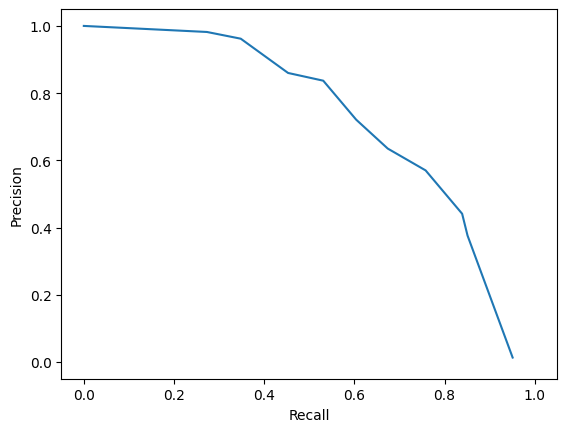

In [23]:
import csv
import numpy as np
import matplotlib.pyplot as plt

def plot_data(csv_file_path: str):
    results = []
    with open(csv_file_path) as result_csv:
        csv_reader = csv.reader(result_csv, delimiter=',')
        next(csv_reader) 
        for row in csv_reader:
            results.append([float(row[0]), float(row[1])])  
        results = np.stack(results)

    # plot precision-recall curve
    plt.plot(results[:, 1], results[:, 0])  
    plt.ylabel("Precision")
    plt.xlabel("Recall")
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.show()


with open("data_file.csv", "w", newline='') as f:
    w = csv.writer(f)
    w.writerow(["precision", "recall"])
    w.writerows([[0.013,0.951],
                [0.376,0.851],
                [0.441,0.839],                    
                [0.570,0.758],
                [0.635,0.674],
                [0.721,0.604],
                [0.837,0.531],
                [0.860,0.453],                    
                [0.962,0.348],
                [0.982,0.273],
                [1.0,0.0]])
# f.close()
plot_data('data_file.csv')

<h1 id="exercise-4"><strong>Exercise 4</strong></h1>

1. Changing the batch_size from 32 to 64 triggers a structural bug. 

    The error occurs because the code concatenates real samples (batch size = N) and generated samples (batch size = N) into a single tensor of size 2N. However, when using batch_size=64, the total number of samples (2 * 64 = 128) does not always match the dataset size (MNIST has 60,000 training images). If the dataset size is not perfectly divisible by batch_size, the last batch will have fewer samples, causing a dimension mismatch when creating labels (expecting 128 labels but getting 96 for a partial batch).

    The root cause is incomplete batches in the DataLoader. To fix this, we add "drop_last=True" to the DataLoader to discard incomplete batches. This ensures every batch has exactly batch_size samples, avoiding dimension mismatches.

    MNIST has 60,000 training samples. For batch_size=64, 60000 / 64 = 937.5, so the last batch (size 32) is discarded, ensuring all batches are size 64.

2. Can you also spot the cosmetic bug?

    The docstring incorrectly uses backticks instead of single quotes ('plot_data') to reference the method name. While this does not affect functionality, it violates Python docstring conventions.

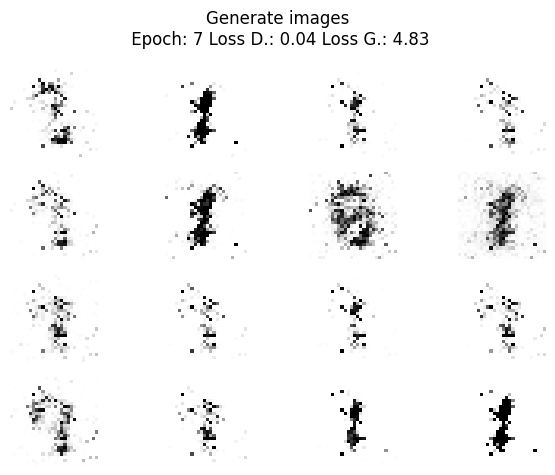

KeyboardInterrupt: 

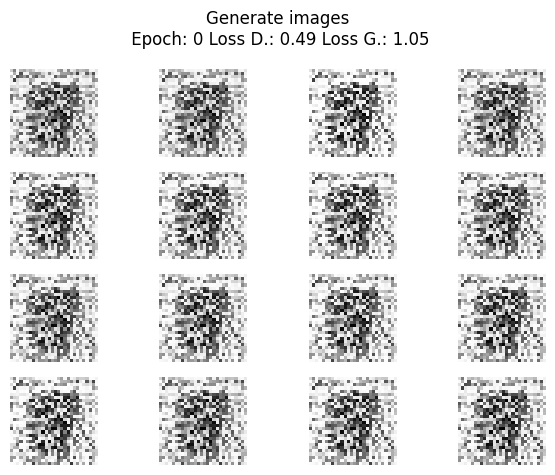

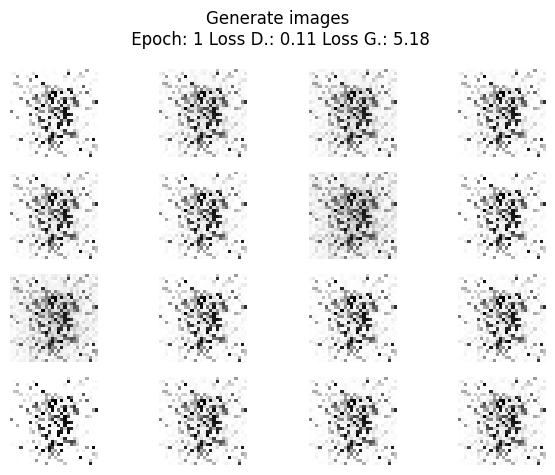

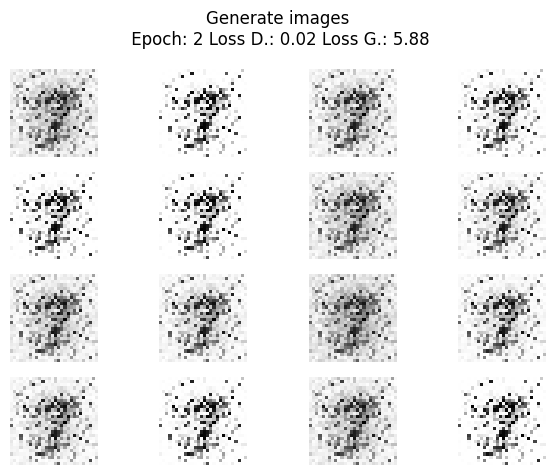

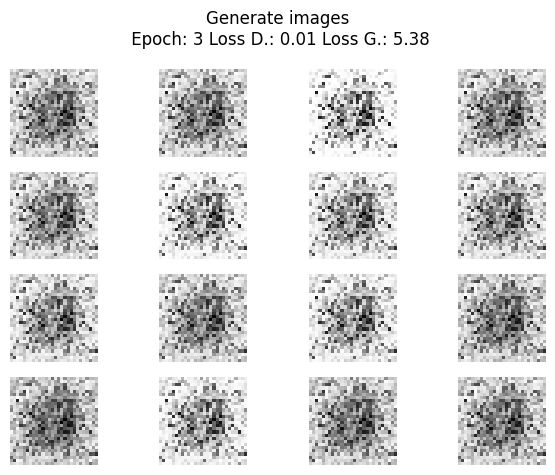

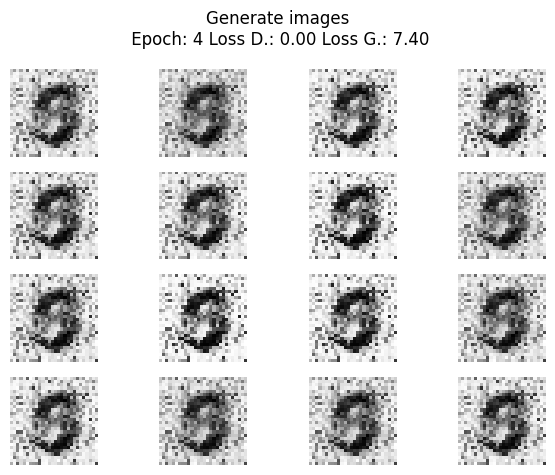

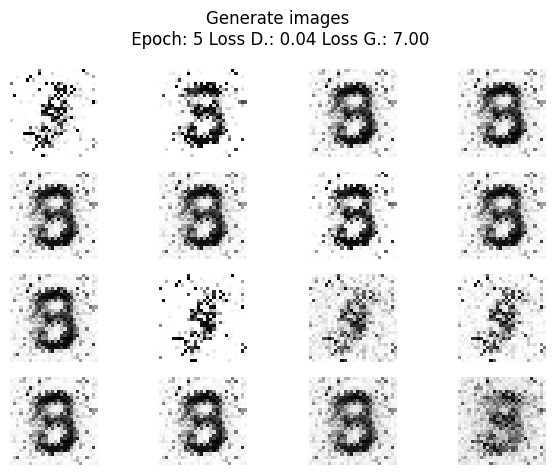

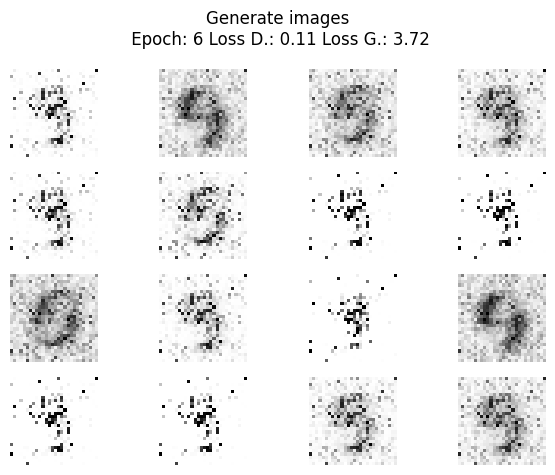

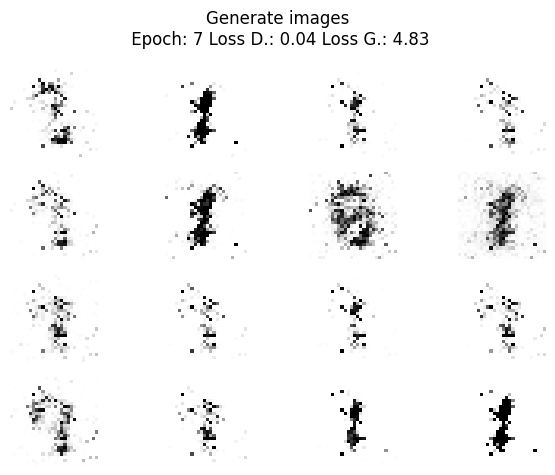

In [43]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

# Generator Model
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256), nn.ReLU(),
            nn.Linear(256, 512), nn.ReLU(),
            nn.Linear(512, 1024), nn.ReLU(),
            nn.Linear(1024, 784), nn.Tanh()
        )

    def forward(self, x):
        output = self.model(x)
        output = output.view(x.size(0), 1, 28, 28)
        return output

# Discriminator Model
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 1024), nn.ReLU(), nn.Dropout(0.3),
            nn.Linear(1024, 512), nn.ReLU(), nn.Dropout(0.3),
            nn.Linear(512, 256), nn.ReLU(), nn.Dropout(0.3),
            nn.Linear(256, 1), nn.Sigmoid()
        )

    def forward(self, x):
        x = x.view(x.size(0), 784)
        output = self.model(x)
        return output


def train_gan(batch_size: int, num_epochs: int, device: str = "cuda" if torch.cuda.is_available() else "cpu"):
   
    # Data loading with drop_last=True
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
    train_set = torchvision.datasets.MNIST(root=".", train=True, download=True, transform=transform)
    train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True, drop_last=True)

    # Set up training
    discriminator = Discriminator().to(device)
    generator = Generator().to(device)
    lr = 0.0001
    loss_function = nn.BCELoss()
    optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
    optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

    # train
    for epoch in range(num_epochs):
        for n, (real_samples, mnist_labels) in enumerate(train_loader):

            # Data for training the discriminator
            real_samples = real_samples.to(device=device)
            real_samples_labels = torch.ones((batch_size, 1)).to(device=device)
            latent_space_samples = torch.randn((batch_size, 100)).to(device=device)
            generated_samples = generator(latent_space_samples)
            generated_samples_labels = torch.zeros((batch_size, 1)).to(device=device)
            all_samples = torch.cat((real_samples, generated_samples))
            all_samples_labels = torch.cat((real_samples_labels, generated_samples_labels))

            # Training the discriminator
            discriminator.zero_grad()
            output_discriminator = discriminator(all_samples)
            loss_discriminator = loss_function(output_discriminator, all_samples_labels)
            loss_discriminator.backward()
            optimizer_discriminator.step()

            # Data for training the generator
            latent_space_samples = torch.randn((batch_size, 100)).to(device=device)

            # Training the generator
            generator.zero_grad()
            generated_samples = generator(latent_space_samples)
            output_discriminator_generated = discriminator(generated_samples)
            loss_generator = loss_function(output_discriminator_generated, real_samples_labels)
            loss_generator.backward()
            optimizer_generator.step()

            # Show loss and samples generated
            if n == batch_size - 1:
                name = f"Generate images\n Epoch: {epoch} Loss D.: {loss_discriminator:.2f} Loss G.: {loss_generator:.2f}"
                generated_samples = generated_samples.detach().cpu().numpy()
                fig = plt.figure()
                for i in range(16):
                    sub = fig.add_subplot(4, 4, 1 + i)
                    sub.imshow(generated_samples[i].reshape(28, 28), cmap="gray_r")
                    sub.axis('off')
                fig.suptitle(name)
                fig.tight_layout()
                clear_output(wait=False)
                display(fig)

if torch.cuda.is_available():
    print("cuda") 
else: 
    print("cpu")
train_gan(batch_size=64, num_epochs=100)
